<a href="https://colab.research.google.com/github/kshitij9969/Deep_Learning_From_Scratch/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow --quiet

In [ ]:
"""
Trying a basic neural network model in tensorflow.
"""
import numpy as np

from tensorflow import keras

"""
Here we are creating a model with one layer and one neuron.

"""

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))
"""
As you can see the result for 10.0 was expected to be 19.0(2 * x - 1 = y). However we got 18.94 which is very close.

There are two reasons we got this result.
1. Number of data points is very less and it will be premature to say that y will always be exactly equal to 2 * x - 1.
2. The neural network deal in probability will try to figure out a "realistic" value of y.
"""



Epoch 1/500
1/1 [==============================] - 0s 440ms/step - loss: 10.6155
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 8.5664
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 6.9499
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 5.6738
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 4.6655
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 3.8682
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 3.2368
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 2.7361
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 2.3382
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 2.0214
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 1.7684
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5658
Epoch 13/500
1/1 [==============================] - 0s 4ms

'\nAs you can see the result for 10.0 was expected to be 19.0(2 * x - 1 = y). However we got 18.94 which is very close.\n\nThere are two reasons we got this result.\n1. Number of data points is very less and it will be premature to say that y will always be exactly equal to 2 * x - 1.\n2. The neural network deal in probability will try to figure out a "realistic" value of y.\n'

4423680/4422102 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 

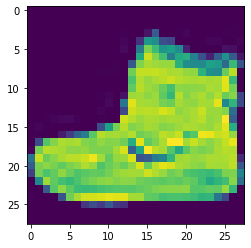

In [ ]:
"""
Computer vision:
Tensorflow has a built dataset called as Fashion MNSIT
"""

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Visualising the data
plt.imshow(train_images[0])
print(train_images[0])


"""
Neural networks better with normalized values.
So we should divide the training data value(which range between 0 and 255) by 255 to
bring them all between 0 and 1.
"""

train_images = train_images / 255
test_images = test_images / 255

"""
Flatten is used to when you have 2d input like an image. It converts the 28 x 28 image
into a linear array. The input shape must match dimensions of the image(i.e. the pixel count)
"""
"""
The last layer must have same number of neuron as the number of classes in your dataset.
In our case it is 10 as we have 10 different types of images the model can predict from.
"""
model = keras.models.Sequential([
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(256, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax)
                                 
])
"""
Sequential: This defines a sequence of layers in the neural network.
Flatten: Our images are rectangular in shape. So we need to convert it to a sequence of input i.e. a linear array of 784 x 1.
Dense: Adds a layer of neurons.
Activation function: Each neuron needs an activation function which tells it what to do exactly.

Relu: Here we are using relu function which is basically if X > 0, X else 0. So it will only pass the values of X that is > 0 to the next layer.

Softmax: Softmax is another activation function we used in the last layer.
What it effectively does is it gives you the largest value in the last layer.
So if the last layer is 
[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05] ----> [0,0,0,0,1,0,0,0,0]
So the largest value refers to the predicted class by the model.

"""
"""
optimizer=tf.train.AdamOptimizer()
"""
model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy")

model.fit(train_images, train_labels, epochs=20)

In [ ]:
"""
model.predict will predict for a single or multiple images at once.
model.evaluate will take two inputs testing images and testing labels and gives loss output.

The output of the model is actually a number and not something like shoes, shirt, skirt etc.
This is done to avoid any bias towards English language.
"""
model.evaluate(test_images, test_labels)

predicted_labels = model.predict(test_images)

print(predicted_labels[0])
"""
The output of predicted_label[0] will be something like this

[5.1996046e-11 5.0243361e-09 1.4180550e-09 5.3475180e-10 3.2800564e-11
 6.2135410e-07 1.1828700e-08 1.9780576e-04 1.8980397e-11 9.9980158e-01]

These are the probabilities of the first image belonging to each of the classes.
For example: It has 5.1996046e-11 probability of belonging to class 1.


"""

313/313 [==============================] - 1s 1ms/step - loss: 0.3682
[1.2865705e-12 1.6190189e-14 3.1735498e-15 3.4882368e-18 3.4191772e-14
 2.7951836e-07 1.2880503e-13 2.1269738e-04 1.5958340e-15 9.9978703e-01]


'\nThe output of predicted_label[0] will be something like this\n\n[5.1996046e-11 5.0243361e-09 1.4180550e-09 5.3475180e-10 3.2800564e-11\n 6.2135410e-07 1.1828700e-08 1.9780576e-04 1.8980397e-11 9.9980158e-01]\n\nThese are the probabilities of the first image belonging to each of the classes.\nFor example: It has 5.1996046e-11 probability of belonging to class 1.\n\n\n'

In [ ]:
"""
Creating another model with 512 neurons.
"""
"""
What happens when you increase the number of neurons?
The training will take longer to complete but the results will be more accurate.
This is however not always true as you increase the number of neurons there is also a
possibility that the improvement will not increase propotionately. This is called Law of Diminishing Returns.


What would happen if you don't use Flatten()?
You will get an error immediately about the shape of the input.
There are two options that you have here. 
1. Have a 28 layer single neuron neural network.
2. Have a single layer with 28 x 28 or 784 x 1 for 

What would happen if we have more than 10 neurons in the last layer?
The number of neuron must be equal to the number of classes. If not you will get an error.

What would happen if we add additional layers?
In our case since the data is quiet simple without any colours, we won't see any significant improvement in our model performance.
However for larger and more complex models we might have to add additonal layers.

What would happen if you increase the number of epochs or iterations?
There will come a point after which the model performance won't increase significantly or infact the performance decreases(loss increase) sometimes.
This leads to a problem of overfitting which is something you need to keep an eye out for. If you don't see any significant improvement in performance,
you can stop training the model.

What would be the impact of not normalizing the dataset?
The accuracy improves if we normalize the dataset.
Without normalizing the input images time taken is 320s and the accuracy is 0.4080
With normalization of the input images time taken is 320s and the accuracy is 0.1535

"""
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images / 255
test_images = test_images / 255

model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=20)

predictions = model.evaluate(test_images)


2.4.0
4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5888
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3664
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3197
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2987
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2771
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2667
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2547
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2422
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2316
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2178
Epoch 11/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2113
Epoch 12/20
1875

##Impact of not normalizing the dataset

In [ ]:

"""
What would be the impact of not normalizing the dataset?
Without normalizing the dataset after 20 epochs we have around 0.4 loss
whereas after normalizing the dataset after 20 epochs we had 0.15 loss
"""


import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# train_images = train_images / 255
# test_images = test_images / 255

model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=20)

predictions = model.evaluate(test_images)


2.4.0
Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 13.8133
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5603
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5045
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4814
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4914
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4707
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4604
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4473
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4602
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4501
Epoch 11/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4525
Epoch 12/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [ ]:
"""
Using a callback function to stop training once we have achieved sufficient accuracy.
You can use tf.keras.callbacks.Callback by inheriting the class and creating a 
on_epoch_end function.
"""

import tensorflow as tf

from tensorflow import keras

class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print('\nReached 60% accuracy')
      self.model.stop_training = True


callbacks = MyCallBack()
mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.models.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(512, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4731
Epoch 2/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.3588
Reached 60% accuracy
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3588


Some basic tensorflow concepts from the tensorflow tutorial. 

Link: https://www.tensorflow.org/guide/basics

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
'''
Tensors are immutable multi-dimensional arrays with a uniform type. 
Scalar - 4
Vector - [1, 2, 3]
Matrix - [[1, 2, 3],
          [4, 5, 6]]
The tf.tensor requires the data to be rectangular i.e. each axis must have same number 
of elements. 
Types of tensors:
Ragged tensors: 
[[0, 1, 2, 3],
[4, 5],
[6, 7, 8],
[9]]

Sparse tensors:
[1, , , ,],
[ , , 2, ],
[ , , , ]
'''
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])
print(x)
print(x.shape)
print(x.dtype)

# Basic operations
print(x + x)

print(5 * x)

print(x@tf.transpose(x))
print(tf.concat([x, x, x], axis=0))
print(tf.nn.softmax(x, axis=1))

print(tf.reduce_sum(x, axis=0))

# Check if tensorflow is using GPU
if tf.config.list_physical_devices("GPU"):
    print("Tensorflow **IS** using the GPU")
else:
    print("Tensorflow **IS NOT** using the GPU")


ragged_tensor = tf.ragged.constant([[0, 1, 2, 3],
[4, 5],
[6, 7, 8],
[9]]
)
print(ragged_tensor)

# All strings are byte string and are utf-8 encoded. 
tf.constant("🥳👍")

scalar_string_tensor = tf.constant(['Gray wolf',
                                    'Quick brown fox',
                                    'Lazy dog'])
print(scalar_string_tensor)
tf.strings.split(scalar_string_tensor, sep=" ")
# The tensor object got automatically converted to ragged tensor object. 

text = tf.constant("1 10 100")
tf.strings.to_number(tf.strings.split(text, " "))

byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print(byte_strings)
print(byte_ints)

# Sparse tensors
sparse_tensor = tf.sparse.SparseTensor(indices = [[0, 0], [1, 2]],
                                       values = [1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor)
print(tf.sparse.to_dense(sparse_tensor))


c = tf.constant([[4., 5.], [10., 1.]])

print(tf.reduce_max(c)) # Get max from whole matrix
print(tf.argmax(c, axis=1)) # Get max from 
print(tf.nn.softmax(c))

# Shape: shape of tensor
# Rank: Number of dimensions of a tensor. Scalar has 0. Vector has 1. Matrix has 2. 
# Axis or Dimension - A particular dimension of a tensor
# Size: Total number of elements in a tensor. 

rank_4_tensor = tf.zeros([3, 2, 4, 5])
# Dtype
print(rank_4_tensor.dtype)
# Number of axes
print(rank_4_tensor.ndim)
# Shape of tensor
print(rank_4_tensor.shape)
# Elements along axis 0 of tensor
print(rank_4_tensor.shape[0])
# Elements along last axis of tensor
print(rank_4_tensor.shape[-1])
# Total number of elements
print(tf.size(rank_4_tensor).numpy())


# Variables are mutable
var = tf.Variable([0.0, 0.0, 0.0])

var.assign([1, 2, 3]) # Assign 1, 2, 3 to the variable

print(var)

var.assign_add([1, 1, 1]) # Add one to corresponding elements
print(var)


# Automatic differentiation
x = tf.Variable(1.0)
def f(x):
    y = x**2 + 2*x - 5
    return y

print(f(x))

with tf.GradientTape() as tape:
    g_x = tape.gradient(f(x), x)
    print(g_x)

# Performance optimization: 
@tf.function
def my_func(x):
    print("Tracing. ")
    return tf.reduce_sum(x)

x = tf.constant([1, 2, 3])

# What @tf.function does is that after first execution it will capture a complete
# optimized graph representing the tensorflow computations done with the function. 
# On subsequent calls it will only execute the tensorflow part and skip all other parts. 
# For example after the first execution of my_func it will not print "Tracing. "

print(my_func(x))
print(my_func(x))
print(my_func(x))

x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)
# A new graph is constrcted if the input signature(shape and dtype) changes. 

# Module, layers, and models

'''
tf.Module is a class for managing your tf.Variable objects and tf.function 
objects that operate on them. 
Features of tf.Module
1. You can save and restore the values of your variables using tf.train.Checkpoint. 
You can save and restore a model's state. 
2. You can import and export the tf.Variable values and the tf.function graphs 
using tf.saved_model. This allows you to run your model independently of the python
program that created it. 
'''

class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)
    
    @tf.function
    def multiple(self, x):
        return x * self.weight

mod = MyModule(3)
mod.multiple(tf.constant([1, 2, 3]))
save_path = '/content/'
tf.saved_model.save(mod, save_path)



tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>
tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 5. 10. 15.]
 [20. 25. 30.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]], shape=(6, 3), dtype=float32)
tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.09003057 0.24472848 0.66524094]], shape=(2, 3), dtype=float32)
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
Tensorflow **IS NOT** using the GPU
<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>
tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)
tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)
SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_sh

In [3]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiple(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [4]:
tf.Variable([1, 2, 3]) * tf.constant([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9], dtype=int32)>

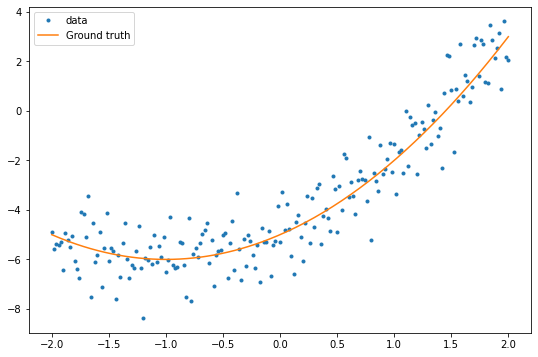

In [5]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()



class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        # First layer of the model with units equal to 64. 
        # Activation is relu(x if x > 0 else 0)
        # Kernal initializer basically assigns random values to weights from a normal distribution. 
        # bias initializer basically assigns random values to biases from a normal distribution. 
        self.dense1 = tf.keras.layers.Dense(units=units,
                                            activation=tf.nn.relu,
                                            kernel_initializer=tf.random.normal,
                                            bias_initializer=tf.random.normal)
        # Second layer holds the output value of the first layer. The predicted value. 
        self.dense2 = tf.keras.layers.Dense(1)
    
    def call(self, x, training=True):
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis=1)

model = Model(64)



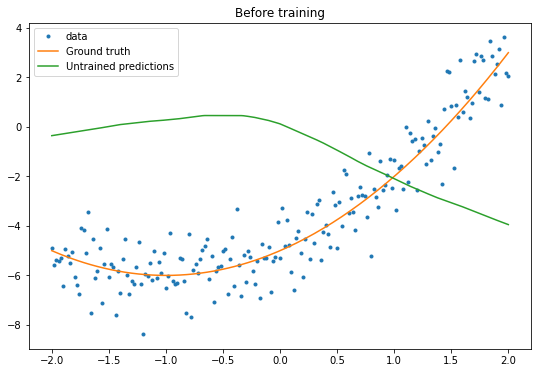

In [6]:
# Since the weights are not fine tuned the prediction will return random values. 

plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend()

In [7]:
variables = model.variables

# We'll use Stochastic gradient descent as optimizer. 
optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
    with tf.GradientTape() as tape:
        # Get the current prediction
        prediction = model(x)
        # Calculate the error
        error = (y - prediction) ** 2
        # For all the predictions get the mean error. 
        mean_error = tf.reduce_mean(error)
    # Differentiate and get the gradient
    gradient = tape.gradient(mean_error, variables)
    # SGD will apply the gradients to the variables. Basically fine tune them
    # such that the overall losses reduce. 
    optimizer.apply_gradients(zip(gradient, variables))
    if step % 100 == 0:
        print(mean_error.numpy())

24.477814
0.90989876
0.89927787
0.89123154
0.8858001
0.8814425
0.8784252
0.87590414
0.8737355
0.8719229


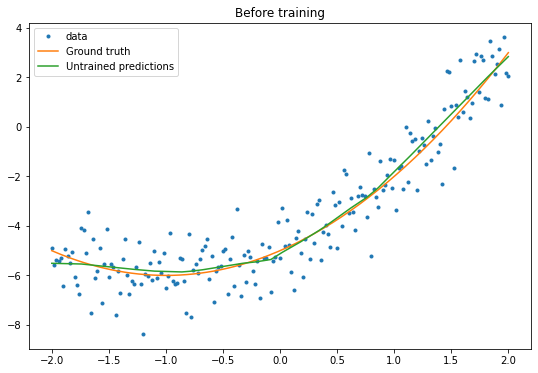

In [8]:
# After fine tuning the weights. 
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend()

In [9]:
# The above loop can be automated. 
new_model = Model(64)
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer = tf.optimizers.SGD(learning_rate=0.01)
)

history = new_model.fit(x, y,
                        epochs = 100,
                        batch_size = 32,
                        verbose = 0)

model.save("./content/")


INFO:tensorflow:Assets written to: ./content/assets


Text(0.5, 1.0, 'Keras training progress')

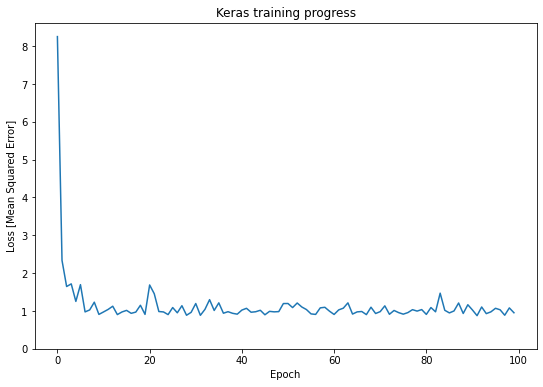

In [10]:
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylim([0, max(plt.ylim())])
plt.ylabel("Loss [Mean Squared Error]")
plt.title("Keras training progress")

In [11]:
# Automatic differentiation and gradients

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2
    dy_dx = tape.gradient(y, x)
    # y is the target or function of x and the second argument x is the value. 
    print(dy_dx.numpy())

# Gradient tape records relevant operations executed inside the context of a GradientTape. 
# During backpropogation it goes through the list of gradients. 

# Here x is not scalar
w = tf.Variable(tf.random.normal((3, 2), name='w'))
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)
    [d1_dw, d1_db] = tape.gradient(loss, [w, b])

print(d1_dw)
print(d1_db)

my_vars = {
    "w": w,
    "b": b
}

grad = tape.gradient(loss, my_vars)
print(grad['b'])


6.0
tf.Tensor(
[[-0.19430354 -1.2698277 ]
 [-0.38860708 -2.5396554 ]
 [-0.58291066 -3.809483  ]], shape=(3, 2), dtype=float32)
tf.Tensor([-0.19430354 -1.2698277 ], shape=(2,), dtype=float32)
tf.Tensor([-0.19430354 -1.2698277 ], shape=(2,), dtype=float32)


In [12]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])
with tf.GradientTape() as tape:
    # forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)

grad = tape.gradient(loss, layer.trainable_variables)


In [13]:
for var, g in zip(layer.trainable_variables, grad):
    print(f"{var.name},{var} shape: {g.shape}, {g}")

dense_4/kernel:0,<tf.Variable 'dense_4/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.2931947 , -0.5554411 ],
       [ 0.9668102 , -1.0857971 ],
       [ 0.79594123,  0.03331828]], dtype=float32)> shape: (3, 2), [[ 4.0282493  0.       ]
 [ 8.056499   0.       ]
 [12.084747   0.       ]]
dense_4/bias:0,<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)> shape: (2,), [4.0282493 0.       ]


In [14]:
x0 = tf.Variable(3.0, name='x0')
# By default Variables are not trainable. Which means that although its value can be updated 
# When you call apply_gradient function on the optimizer it will not update the gradient. To update the 
# variables you need to set trainable=True while defining a variable. By default a variable is trainable. 

x1 = tf.Variable(3.0, name='x1', trainable=False)
x2 = tf.Variable(2.0, name='x2') + 1.0 # Not a variable(variable + tensor = tensor)
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [15]:
# Only x0 is being watched as it is the only trainable
[var.name for var in tape.watched_variables()]

['x0:0']

[  4. 108.]
[2. 6.]
4.0
-0.25
3.75
7.0
tf.Tensor(1.0, shape=(), dtype=float32)
None
None
None
ResourceVariable : tf.Tensor(4.0, shape=(), dtype=float32)
ResourceVariable : tf.Tensor(6.0, shape=(), dtype=float32)
None
None
gradient registry has no entry for: AdjustContrastv2
tf.Tensor([0. 0.], shape=(2,), dtype=float32)


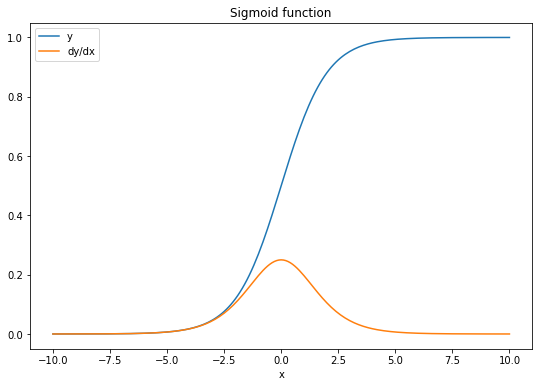

In [69]:
x = tf.constant([1, 3.0])

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y

print(tape.gradient(z, x).numpy())
print(tape.gradient(y, x).numpy())
tape.watched_variables()
# Performance:
# There is a overhead associated with doing operations inside a gradient tape context. 
# Gradients tape use memory to store intermediate results, including inputs and outputs. 
# For efficieny some ops lke ReLU don't need to keep their intermediate results and they are 
# pruned during the forward pass. 


x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape: # We make this persistent so that it can calculate multiple gradients. Like y0 = f(x) and y1 = f(y) so grad of y1 can be calculate if persistent is True. 
    y0 = x ** 2
    y1 = 1 / x
    print(tape.gradient(y0, x).numpy()) # This will return grdient of y0 wrt x
    print(tape.gradient(y1, x).numpy()) # This will return gradient of y1 wrt x
    print(tape.gradient({"y0": y0, "y1": y1}, x).numpy()) # This will give sum of gradients



x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape: 
    y0 = x * [3., 4.]
    print(tape)
    print(tape.gradient(y0, x).numpy()) # Sum of gradients

x = tf.linspace(-10.0, 10.0, 200 + 1)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
plt.xlabel('x')
plt.title('Sigmoid function')


# Some cases when gradient will be None

# In this case since result is always v0 so gradient wrt v1 is None
x = tf.constant(1.0)
v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x > 0.0:
        result = v0
    else:
        result = v1 ** 2

dv0, dv1 = tape.gradient(result, [v0, v1])

print(dv0)
print(dv1)

# Here z is not a function of x so gradient is None. 

dx = tape.gradient(result, x)
print(dx)

x = tf.Variable(2.)
y = tf.Variable(3.)
z = y * y

with tf.GradientTape() as tape:
    print(tape.gradient(z, x))


# If the variable become a tensor GradientTape will calculate its gradient is None. Use assign_add to update value of a variable.  

x = tf.Variable(2.0)

for epoch in range(2):
    with tf.GradientTape() as tape:
        y = x ** 2 # Accidently converted variable to tensor
        # y = x
    print(type(x).__name__, ":", tape.gradient(y, x))
    # x = x + 1
    x.assign_add(1) # If you do x = x + 1, x will become a tensor and it 

# If the variable is an integer or a string then the gradient will be None. 

x = tf.constant(10)

with tf.GradientTape() as g:
    g.watch(x)
    y = x * x

print(g.gradient(y, x)) # Tensorflow doesn't automatically do type casting. 


# Taking gradients through a stateful object

# Tensors are immutable and have no state. 
# Variables are mutable and have current state as their current value. Once updated the value changes. 
# GradientTape will not keep a record of previous states of a variable and only operate on its current value. 

x0 = tf.Variable(3.0)
x1 = tf.Variable(0.0)

with tf.GradientTape() as tape:
    x1.assign_add(x0) # This will update value of x1 with x0. 
    y = x1 ** 2 # y = (x1 + x0) ** 2


# When the value of x1 changes Gradient will not record its history and give gradient as None. 
print(tape.gradient(y, x0))


# The operation is registered as being non-differentiable

# For example tf.image.adjust_contrast function does not have gradient implemented. 


image = tf.Variable([[[0.5, 0.0, 0.0]]])
delta = tf.Variable(0.1)

with tf.GradientTape() as tape:
    new_image = tf.image.adjust_contrast(image, delta)


try:
    print(tape.gradient(new_image, [image, delta]))
    assert False
except LookupError as e:
    print(e)


# If you want to implement gradient you can do that and register using tf.RegisterGradient


# If the gradient is unconnected. Meaning not a function. 

x = tf.Variable([2., 2.])
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = y ** 2

# return 0 if the gradient is unconnected. 
print(tape.gradient(z, x, unconnected_gradients = tf.UnconnectedGradients.ZERO))


In [43]:
%%timeit
with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    y = x * x
    z = y * y
    tape2.gradient(z, x).numpy()
    tape2.gradient(y, x).numpy()

1000 loops, best of 5: 1.24 ms per loop


In [44]:
%%timeit
# This is slightly faster. Calculating the gradient outside of the context. 
with tf.GradientTape(persistent=True) as tape1:
    tape1.watch(x)
    y = x * x
    z = y * y
tape1.gradient(z, x).numpy()
tape1.gradient(y, x).numpy()

1000 loops, best of 5: 1.1 ms per loop


Graphs and functions